<a id='Back to top'></a>

# <font color='steelblue'> Predicting Elderly Out-of-pocket Expenditures for Health Care in the United States   </font>

| Name | SNR  |
|------|------|
| Emilie Bartels  | 2028466|
| Larissa Heshusius  | 807104 |

***

## Table of contens

<a href='#Research Question'>Research Question</a>

<a href='#Motivation'>Motivation</a>

<a href='#Data'>Data</a>

<a href='#Methodology'>Methodology</a>

<a href='#Preparing the data'>Preparing the data</a>

<a href='#Results'>Results</a> 

- <a href='#Descriptive Statistics'>Descriptive Statistics</a> 

- <a href='#Linear Regression Model'>Linear Regression</a> 

- <a href='#Lasso Regression'>Lasso Regression</a> 
    
- <a href='#Random Forest Model'>Random Forest</a> 

<a href='#Discussion'>Discussion</a>

<a href='#Conclusion'>Conclusion</a>



***

In [2]:
# Importing the relevant libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import YouTubeVideo
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from scipy.stats import pearsonr
from statistics import stdev, mean
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor
import math

# Hiding annoying warnings
import warnings
warnings.filterwarnings('ignore')

# Allowing plots to appear within the notebook
%matplotlib inline

# Setting a style for the notebook
plt.style.use('seaborn-white')

# Setting the number of decimals to zero
pd.set_option('float_format', '{:.0f}'.format)

In [3]:
%%bash
pip install --user plotly


You are using pip version 9.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import plotly.tools as tls
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

***

<a id='Research Question'></a>

## Introduction

This research is focused on the out of the pocket health care costs of elderly in the US, based on data of 2014. We will use different machine learning techniques like multivariate linear regresion, LASSO regression and random forest regression to investigate the development of out-of pocket health care costs. To optimally analyze the data, we first prepare the data and look at some descriptive statistics to understand the data. We completely conduct our own research which differ from other researches that has been executed on the HRS dataset. We will evaluate the outcomes of our research to answer the following questions:
* ***How will the out-of pocket health care costs of elderly in the US develop for individuals according to machine learning techniques?***

* Which personal characteristics significantly influence these health care costs?
* Which model predicts the out of pocket medical expenditures of eldery best?

***

<a id='Motivation'></a>

## Motivation

***Development health care costs***

Health care is an important topic in countries all over the world since all people are affected by it and it accounts for a large part of the government expenditures. The costs significantly differ between people but everyone gets in touch with it. Total health care expenditures are increasing every year, which is not always completely covered by the government. In the paper <a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5977561/'>Supervised Learning Methods for Predicting Healthcare Costs </a> they mention the national health expenditure grew with 5.8% to 3,2 trillion dollar in 2015. This comes down to $9,900 per person which accounted for approximately 17.8% of the nation’s GDP.    

Since the trend of rising health care costs will keep developing the upcoming years, it is important to control these unsustainable increases. To partially solve this, the future costs could be predicted to efficiently target care management for individuals at the highest risk of incurring these costs. One of these “sensitive” groups are the older, retired people. Since life expectancy of people rise, this group is an important cause for the increasing health care costs. These costs can be one of the biggest expenses for this group and the costs keep growing. Therefore, this research is focused on people with an age of 70+ since a lot of information could be gained here.  

***Individual medical expenditures***

Cost prediction is not only important for health insurers, but also for the patients. The dependent variable in this research is out of pocket medical expenditures which are the costs for the individuals.  It is beneficial for them to know their likely expenditures in advance to optimally choose their insurance plan with the right deductibles and premiums. 
In this research, we investigate which demographic and personal characteristics affect the out of pocket health care costs for individuals. For example, previous <a href='https://www.healthsystemtracker.org/chart-collection/health-expenditures-vary-across-population/#item-health-spending-increases-throughout-adulthood-men-women-spending-varies-age_2015'>research </a> has shown  that gender and race affect out of pocket expenditures. Some of these characteristics could be affected by the individuals, like smoking and alcohol consumption. When people know the effect of these factors, this could result in important policy implications.

***Assumptions***

-Do not take into account policy changes
A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the meaning of the classification model, random forests may not be the best choice.
-

*needs to be finalized; weghalen voorbeelden en toelichten keuze methode* Larissa

(0, 18000)

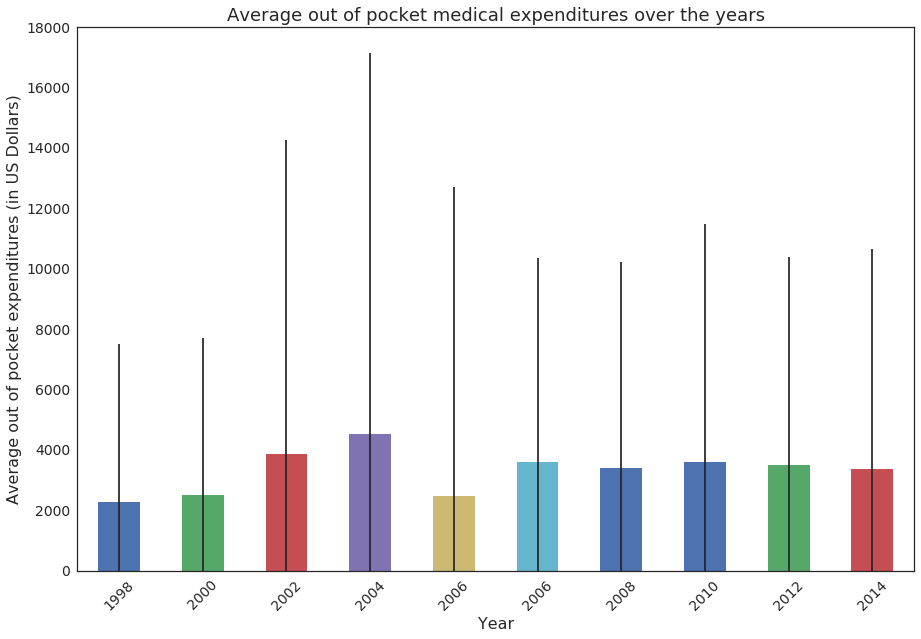

In [5]:
# Importing the data
dataframe2 = pd.read_stata('/home/u1267042/Python Assignment Larissa + Emilie/Dataset wave3-12.dta')

# Creating a Pandas Dataframe
df2 = pd.DataFrame(dataframe2)

# Renaming the columns
df2.rename(columns=
          {'r10oopmd': '2010',
           'r11oopmd' : '2012',
           'r12oopmd' : '2014',
           'r3oopmd' : '2006',
           'r4oopmd' : '1998',
           'r5oopmd' : '2000',
           'r6oopmd' : '2002',
           'r7oopmd' : '2004',
           'r8oopmd' : '2006',
           'r9oopmd' : '2008'
          }, inplace=True) # the column is renamed in place

# Changing the order of columns
cols = list(df2.columns.values)
df2 = df2[['1998', '2000', '2002', '2004', '2006', \
         '2008', '2010', '2012', '2014']]

# Handling missing data
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df2)
df2 = pd.DataFrame(data=imp.transform(df2) , columns=df2.columns)

# Visualizing the mean and standard deviation of out of pocket expenditures over the years
means = np.mean(df2)
std = np.std(df2)
p = means.plot(figsize=(15,10), legend=False,kind="bar",rot=45,fontsize=14,yerr=std)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average out of pocket expenditures (in US Dollars)', fontsize=16)
plt.title('Average out of pocket medical expenditures over the years', fontsize=18)
plt.ylim(0, 18000)

*een stijl aanhouden en deviations toevoegen + toelichten out of pocket* Emilie

***

<a id='Data'></a>

## Data

**Health & Retirement Study**

<div style="text-align: justify"> 


This assignment explores the determinants of out-of pocket health care spending through the use of data from the <a href='http://hrsonline.isr.umich.edu/index.php?p=avail'>Health & Retirement Study U.S.</a> (HRS). The HRS is a longitudinal panel survey among Americans aged 50 and older. The study has been conducted every two years since 1992, and the most recent release is from the year 2016. The survey elicits information about a range of topics: demographics, income, assets, health, family structure, housing, job status and history, expectations, and insurance. Therewith, it is one of the most extensive academic social science projects ever undertaken. The study is administered and conducted by the Survey Research Center (SRC) at the University of Michigan. It is managed through a collaboration between the National Institute on Aging (NIA) and the Social Security Administration (SSA).

The sample of the Health and Retirement Study is considered to be representative for the population they want to analyze, namely all Americans over 50. In total, the group of respondents consists of over 30,000 individuals in approximately 11,000 households. The complete HRS consists of seven cohorts in 2016, and its sample design over the years is as follows: 

</div>

In [6]:
Image("Data/Cohorts-Graph.png", width=700, height=700)

TypeError: a bytes-like object is required, not 'str'

TypeError: 'NoneType' object is not iterable

<div style="text-align: justify"> 

As set forth before, the HRS is extraordinarily comprehensive, but that also makes it more complex.Therefore, we will use the <a href='https://www.rand.org/well-being/social-and-behavioral-policy/centers/aging/dataprod/hrs-data.html'>RAND HRS Longitudinal File</a>, which is a user-friendly file derived from all waves. It contains cleaned and processed variables with consistent and intuitive naming conventions, model-based imputations, and spousal counterparts of most individual-level variables. 

For the purpose of this research, a narrower selection in the sample as well as variables will be made from this HRS datafile.
</div>

<a id='Selecting relevant variables'></a>

**Selecting relevant variables**

The original file consists of 11,465 variables for 37,495 respondents, but only a few of those are relevant for the research question at hand. Therefore, we provide an overview of the relevant variables, their definition, and measurement:

*Target*
- Out-of pocket medical expenditures: total expenses for medical care that were not reimbursed by insurance in the previous 2 years, reported in nominal US dollars. 

    Out-of-pocket costs include deductibles, coinsurance, and copayments for covered services plus all costs for services that aren't covered. The survey inclues nine categories of out-of-pocket medical costs: (1) hospital costs; (2) nursing home costs; (3) doctor visits costs; (4) dental costs; (5) outpatient surgery costs; (6) average monthly prescription drug costs; (7) home health care; (8) special facilities costs; and (9) other. 
    
*Features*

 
- Age: calculated as the difference between the respondents’ birthdate and the beginning interview date. The age in years is the integer portion of the number of months old divided by 12.  


- Gender: the individual’s gender is labeled as either 1.male or 2.female (we will change this to our own labels when <a href='#Preparing the data'>preparing the data</a>).


- Race: is labeled as either 1. White/Caucasian or 2. Black/African American or 3. Other.


- Education: the number of academic years a person has completed in a formal program provided by elementary and secondary schools, universities, colleges or other formal post-secondary institutions.


- Income: all income components are summed on the household level and reported in nominal US dollars.


- Children: provides the number of living children of the respondent and spouse or partner


- Self-reported health: a categorical variable reflecting the self-reported general health status. The respondents are asked to rate their health according to the categories 1 = excellent; 2 = very good; 3 = good; 4 = fair; and 5 = poor (we will change this to our own labels when <a href='#Preparing the data'>preparing the data</a>).. 


- BMI: the respondent's body mass index reflects body weight adjusted for height. Height, given in feet and inches, is converted to meters. Weight is converted to kilograms. The final BMI is calculated by the formula: $BMI = \displaystyle\frac{weight}{height^2}$


- Alcohol: indicates the number of days per week a respondent drinks alcoholic beverages.


- Smoking: indicates whether the respondent currently smokes cigarettes, labeled as either 0 = no or 1 = yes.


- Moderate physical exercise: indicates how often moderate physical activity occurs: 1.every day, 2.more than once per week, 3.once per week, 4.one to three times per month, or 5.never.


- Covered by government: indicates whether the respondent is covered by any government health insurance program.


- Covered by employer: indicates whether the respondent is covered by health insurance from her/his current or previous employer.

There are cross-wave differences in the data. For example, components of out of pocket medical expenditures are added to the survey over the years. Furthermore, the reference period was prolonged from 1 year to 2 years from wave 3 onwards. In order to make a good prediction, we will focus on the 12th wave. This is the most recent wave for which we have all the relevant data available. The 12th wave contains data from the 2014 survey. 

**Selecting relevant respondents**

We will focus on the group of eldery between the age of 73 and 83 years old, belonging to the so-called 'orginal cohort' (i.e. born in 1931-1941).

**Final Sample**

In the end, we extract the following variables from the <a href='https://www.rand.org/well-being/social-and-behavioral-policy/centers/aging/dataprod/hrs-data.html'>RAND HRS Longitudinal File</a>: 

| Variable | Code  | Type  |
|------|------|------|
| **Demographics, Identifiers, and Weights**  | **Section A**| |
| Age  | r12agey_b | Continuous |
| Gender  | ragender | Categorical |
| Education  | raedyrs | Continuous |
| Race  | raracem | Categorical |
||||
| **Health**  | **Section B** | |
| Medical care utilization: Out of Pocket | r12oopmd | Continuous|
| Self-reported health| r12shlt |Categorical|
| BMI  | r12bmi | Continuous |
| Alcohol  | r12drinkd | Categorical |
| Smoking | r12smoken |Categorical|
| **Income**  | **Section D** | |
| Total household income  | h12itot | Continuous |
||||
| **Health Insurance**  | **Section G** | |
|Covered by government|r12higov|Categorical|
|Covered by former employer|r12prpcnt|Categorical|
||||
| **Family Structure**  | **Section H** | |
|Number of children|h12child|Continuous|

In the section <a href='#Preparing the data'>preparing the data</a> we will elaborate on our approach to extract and filter this data. 

***

<a id='Methodology'></a>

## Methodology

**Supervised Machine Learning**



_Regression models_
Regression problems are supervised learning problems in which the response is continuous. 

Based on the given datasets the machine learning problem is categorised into two types, Classification, and Regression. If the given data has both input (training) values and output (target) values, then it is a Classification problem. If the dataset has continuous numerical values of attributes without any target labels, then it comes under Regression problem.


We will use the sklearn package in order to perform linear and the lasso regression. 

**Multiple Linear Regression Model**

*Model*

LinearRegression fits a linear model with coefficients  to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. A multiple linear regression model involves more than 1 predictor, thus has more than 1 slope coefficient. It still estimates B0, B1, B2, etc. by minimizing RSS. 

It takes the following form:

$y=β0+β1x1+β2x2+...+βnxn$

Where 
- y  is the response
- β0  is the intercept
- β1  is the coefficient for  x1  (the first feature)
- βn  is the coefficient for  xn  (the nth feature)

In this case: 

$BMI = β0 + β1 x age +β2 x bmi +...+βnxn$

The  β  values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions. 

Form of linear regression
y=β0+β1x1+β2x2+...+βnxn 
y  is the response
β0  is the intercept
β1  is the coefficient for  x1  (the first feature)
βn  is the coefficient for  xn  (the nth feature)

Null hypothesis: B1 = B2 = etc. = 0.

On the one hand, this model is fast, does not require tuning, is highly interpretable, and well-understood. On the other hand, it is unlikely to produce the best predictive accuracy, 

*Assumptions*
- Non-linear relationships
This model presumes a linear relationship between the features and response. If the relationship is highly non-linear, as with many scenarios, linear relationship will not effectively model the relationship and its prediction would not be accurate.


- Non-constant variance of residuals (aka "heteroskedasticity")
Indicated by funnel shape in residual plot. Try transforming y using a concave function: ln(y), sqrt(y). 


- Outliers
Plot studentized residuals: greater than 3 is an outlier. Try removing the observation from the dataset.


- Collinearity
Exists whenever there is a correlation between two or more predictors. Detect pairs of highly correlated variables by examining the correlation matrix for high absolute values. Try removing one of the correlated predictors from the model, or combining them into a single predictor

**Lasso Regression Model**

*Model*


*Assumptions*

**Random Forest Model**

*Model*

The random forest model is one of the machine learning algorithms, a supervised learning algorithm. In general, the Random forest is a fast, simple and flexible tool which performs very well since training and predictions are fast due to the simplicity of underlying decision trees. The main idea of the model is that multiple decision tree will be build which will be merged together to get a more accurate and stable prediction. The algorithm of the Random Forest randomly selects observations and features from the data and builds various decision trees to average the results. Most of the time, the random forest is able to prevent of the time by creatin subsets of features and build smaller trees.
With the model, we can easily measure the relative importance of each feature on the future prediction. 

*Bagging method*

More randomness and diversity is integrated with the bagging method to feature space in the random forest method. The random forests are trained via this bagging method, which consists of randomly sampling subsets of the training data, which fits a model to he smaller data sets (fitting decsision trees to the subsets) and aggregrates the result. The idea of the bagging methods is that combining learning models increases the overall result and give some idea about the correctness of the model. 

*Feature importance*

An important part of the model is its ability to measure the relative of the features on the prediction (the X variables in our  case). By looking at the importances of each variable, we can see which features do not contribute to the prediction process, since the sum of all importance equals 1. In this research we also use the from the Sklearn package, which measures the feature importance by looking at how much the tree nodes will reduce impority between all the trees in the random forest (<a href='https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd/'>source </a>).


*Assumptions*
- Since we deal with a continuous Y variable, we use the RandomForestRegressor instead of the Classifier. 
- Predicted values at each node is the average response variable for the observations in the node 
- Overfitting is a problem that may occur in machine learning (and random forest model) and could lead to worse performance of the model. If a model performs way better on a training set than the test set, it is likely that the model is overfitting and the trends in the data is too noisy. If the model is overfitting, we can be less accurate about the outcomes of the model. When more features are added to the model, this could also lead to overfitting.
- The accuracy of the model also depends on its hyperparameters. The random forest adds more randomness to the model while growing trees to search for the best feature among the random subset of features. in this research we use the standard parameters of the RandomForestRegressor. 
- The random forest is a tool mainly used for predictions and not descriptions, so it is not the optimal approach to describe relationships in the data.
- The model can handle different types of feature types, so we can take this into account when handling the data.
- A disadvantage of the model is that the results are not easily interpretable and it can be hard to draw conclusions about the meaning of the model. Since we will produce a simple version of the model we take this into account.

*Beiden stuk afmaken*

In [ ]:
YouTubeVideo('D_2LkhMJcfY')

***

<a id='Preparing the data'></a>

## Preparing the data

Since the original dataset consists of 11,465 variables for 37,495 respondents, we cannot directly load this into Python. Therefore, we extracted the <a href='#Selecting relevant variables'>relevant variables</a> in Stata and subsequently load this dataset into the notebook. Any further preparations of the data in order to be able to analyze it, will be done in Python.

In [18]:
# Importing the data
dataframe = pd.read_stata('/home/u1267042/Python Assignment Larissa + Emilie/Dataset wave12 final set.dta')

# Creating a Pandas Dataframe
df = pd.DataFrame(dataframe)

# Getting a first look
df.head()

,ragender,raracem,raedyrs,r12agey_b,r12shlt,r12bmi,r12smoken,r12drinkd,r12oopmd,h12itot,r12higov,r12prpcnt,h12child
0,1.male,1.white/caucasian,16,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,nan
1,2.female,1.white/caucasian,8,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,nan
2,1.male,1.white/caucasian,12,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,nan
3,2.female,1.white/caucasian,16,75,4.fair,23,0.no,0.0 or doesnt drink,1940,703500,1.yes,0,5
4,1.male,1.white/caucasian,12,74,3.good,21,0.no,0.0 or doesnt drink,144,12000,1.yes,0,0


It is often said that 80% of the effort of analysis is in data cleaning. The paper <a href='https://www.researchgate.net/publication/215990669_Tidy_data'>Tidy data </a> by Hadley Wickham (2014) offers a set of tools that are useful to deal with a large number of messy data sets.

In [19]:
# Renaming the columns
df.rename(columns=
          {'ragender': 'gender',
           'raedyrs' : 'education',
           'r12agey_b' : 'age',
           'r12shlt' : 'health',
           'r12bmi' : 'bmi',
           'r12smoken' : 'smoking',
           'r12drinkd' : 'alcohol',
           'r12oopmd' : 'out of pocket',
           'h12itot' : 'income',
           'raracem' : 'race',
           'h12child' : 'children',
           'r12higov' : 'covered_government',
           'r12prpcnt' : 'covered_employer',           
          }, inplace=True) # the column is renamed in place


In [20]:
# Inspecting the data
print('This dataframe consists of',df.shape[0],'rows and',df.shape[1],'columns')

This dataframe consists of 37495 rows and 13 columns


In [21]:
# Counting missing values
df.isnull().sum().sort_values(ascending=False)

bmi                   19053
children              19049
covered_employer      18983
covered_government    18898
smoking               18857
alcohol               18838
health                18764
income                18748
out of pocket         18748
age                   18748
education               127
race                     84
gender                    0
dtype: int64

We have missing values in each column, but our models cannot handle missing data. The simplest resolution would be to remove observations that have missing data. However, removing missing data can introduce a lot of issues. When data is randomly missing, you potentially lose a lot of your data. When data is non-randomly missing, in addition to losing data, you are also introducing potential biases. When applying this approach, we would lose almost 50 per cent of our data (we would be left with 18,155/37,495 entries). Therefore, this solution would not be optimal.

An alternative solution is to use imputation by replacing missing values with another value. There are many options we could consider when replacing a missing value, for example a random value, mean, median, mode or a value estimated by another predictive model. We opt for the median, because the dataset has great outliers.

We use the scikit-learn library, which provides the Imputer() pre-processing class that can be used to replace missing values. The Imputer class operates directly on the NumPy array instead of the DataFrame.

In [22]:
# Creating dummy variables 
df['gender'] = df.gender.map({'2.female':0, '1.male':1})
df['smoking'] = df.smoking.map({'0.no': 0, '1.yes': 1})

In [23]:
# Converting categorical and ordinal features into numeric features
replacements0 = {
    '1.white/caucasian': 1,
    '2.black/african american': 2,
    '3.other' : 3
}
df['race'].replace(replacements0, inplace=True)

replacements1 = {
  '0.none':0,
  '17.17+ yrs': 17
}
df['education'].replace(replacements1, inplace=True)

replacements2 = { 
  '5.poor': 1, # replacing the string by a numeric value 
  '4.fair': 2,
  '3.good': 3,
  '2.very good': 4,
  '1.excellent': 5
}
df['health'].replace(replacements2, inplace=True)

replacements3 = {
  '0.0 or doesnt drink': 0
}
df['alcohol'].replace(replacements3, inplace=True)

replacements4 = {
  '0.no':0,
  '1.yes': 1
}
df['covered_government'].replace(replacements4, inplace=True)

In [24]:
# Creating multiple dummy variables using get_dummies, then excluding the first dummy column
alcohol_dummies = pd.get_dummies(df.alcohol, prefix='alcohol').iloc[:, 1:]
health_dummies = pd.get_dummies(df.health, prefix='health').iloc[:, 1:]
race_dummies = pd.get_dummies(df.race, prefix='race').iloc[:, 1:]

# Concatenating the dummy variable columns onto the DataFrame
df = pd.concat([df, health_dummies], axis=1)
df = pd.concat([df, alcohol_dummies], axis=1)
df = pd.concat([df, race_dummies], axis=1)

*aanpassen* Creating multiple dummy variables using get_dummies,\
#then exclude the first dummy column for the multivariate linear regression and the LASSO regression

In [25]:
# Transforming variables to log-variables
df['log_' + 'income'] = np.log(df['income'])

*uitleggen log*

In [26]:
df0 = df[['out of pocket', 'age', 'gender', 'race', 'education', 'log_income','children',\
      'health', 'bmi', 'alcohol', 'smoking', 'covered_government', 'covered_employer']]

In [27]:
# Changing the order of columns
cols = list(df.columns.values)
df = df[['out of pocket', 'age', 'gender', 'race_2.0', 'race_3.0', 'education', 'log_income','children',\
      'health_2.0', 'health_3.0', 'health_4.0', 'health_5.0', 'bmi', 'alcohol_1.0', 'alcohol_2.0', 'alcohol_3.0', \
      'alcohol_4.0',  'alcohol_5.0', 'alcohol_6.0', 'alcohol_7.0', 'smoking', 'covered_government', 'covered_employer']]

In [28]:
# Retrieving data types
print(df.dtypes)

out of pocket         float64
age                   float64
gender                  int64
race_2.0                uint8
race_3.0                uint8
education             float64
log_income            float64
children              float64
health_2.0              uint8
health_3.0              uint8
health_4.0              uint8
health_5.0              uint8
bmi                   float64
alcohol_1.0             uint8
alcohol_2.0             uint8
alcohol_3.0             uint8
alcohol_4.0             uint8
alcohol_5.0             uint8
alcohol_6.0             uint8
alcohol_7.0             uint8
smoking               float64
covered_government    float64
covered_employer      float64
dtype: object


Notice the value _inf_ (infinity), which is a value that is greater than any other value. In contrast, the value _-inf_ is  smaller than any other value.

In [29]:
# Handling infinite values
df.replace([np.inf], np.nan, inplace=True)
df.replace([-np.inf], np.nan, inplace=True)
df.head()

,out of pocket,age,gender,race_2.0,race_3.0,education,log_income,children,health_2.0,health_3.0,...,alcohol_1.0,alcohol_2.0,alcohol_3.0,alcohol_4.0,alcohol_5.0,alcohol_6.0,alcohol_7.0,smoking,covered_government,covered_employer
0,nan,nan,1,0,0,16,nan,nan,0,0,...,0,0,0,0,0,0,0,nan,nan,nan
1,nan,nan,0,0,0,8,nan,nan,0,0,...,0,0,0,0,0,0,0,nan,nan,nan
2,nan,nan,1,0,0,12,nan,nan,0,0,...,0,0,0,0,0,0,0,nan,nan,nan
3,1940,75,0,0,0,16,13,5,1,0,...,0,0,0,0,0,0,0,0,1,0
4,144,74,1,0,0,12,9,0,0,1,...,0,0,0,0,0,0,0,0,1,0


NaN stands for "Not a Number", so it is not possible to do arithmetic with it.

We have missing values in each column, but our models cannot handle missing data. The simplest resolution would be to remove observations that have missing data. However, removing missing data can introduce a lot of issues. When data is randomly missing, you potentially lose a lot of your data. When data is non-randomly missing, in addition to losing data, you are also introducing potential biases. When applying this approach, we would lose almost 50 per cent of our data (we would be left with 18,155/37,495 entries). Therefore, this solution would not be optimal.

An alternative solution is to use imputation by replacing missing values with another value. There are many options we could consider when replacing a missing value, for example a random value, mean, median, mode or a value estimated by another predictive model. We opt for the median, because the dataset has great outliers.

We use the scikit-learn library, which provides the Imputer() pre-processing class that can be used to replace missing values. The Imputer class operates directly on the NumPy array instead of the DataFrame.

In [30]:
# Handling missing data
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df) , columns=df.columns)

# Recounting missing values 
df.isnull().sum().sort_values(ascending=False)

covered_employer      0
health_4.0            0
age                   0
gender                0
race_2.0              0
race_3.0              0
education             0
log_income            0
children              0
health_2.0            0
health_3.0            0
health_5.0            0
covered_government    0
bmi                   0
alcohol_1.0           0
alcohol_2.0           0
alcohol_3.0           0
alcohol_4.0           0
alcohol_5.0           0
alcohol_6.0           0
alcohol_7.0           0
smoking               0
out of pocket         0
dtype: int64

This is a type of data we can work with in our models.

For the purpose of this research, we only want to look at people from the 3rd cohort and age between 73 and 83 years old.

In [31]:
df = df[~(df['age'] <= 69)] 
df = df[~(df['age'] >= 90)] 

*Poging met andere ages en toelichten*

An outlier is an observation that deviates drastically from other observations in a dataset. We will use the Interquartile Range (IQR). Any point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile will be seen as an outlier and thus be removed.

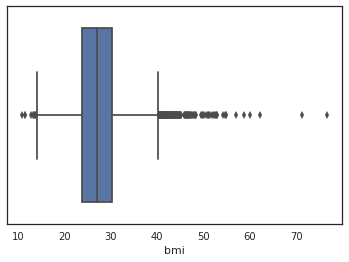

In [32]:
sns.boxplot(x=df["bmi"])

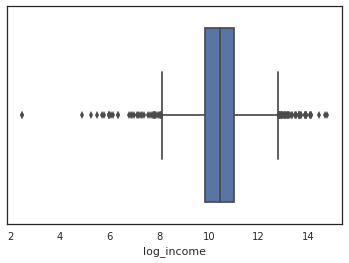

In [33]:
sns.boxplot(x=df["log_income"])

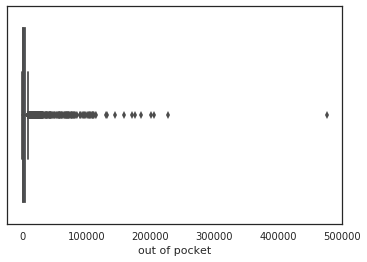

In [34]:
sns.boxplot(x=df["out of pocket"])

In [35]:
# Creating a set of variables that the IQR has to apply to
df3 = df[['log_income', 'bmi', 'out of pocket']]

# Calculating the first and third quartile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculating interquartile range
IQR = Q3 - Q1

# Calculating the outlier cutoff
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper = Q3 + cut_off

# Removing outliers
df = df[~((df3 < lower) |(df3 > upper)).any(axis=1)]

*toelichten wat we doen*

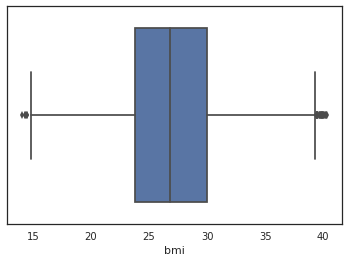

In [36]:
sns.boxplot(x=df["bmi"])

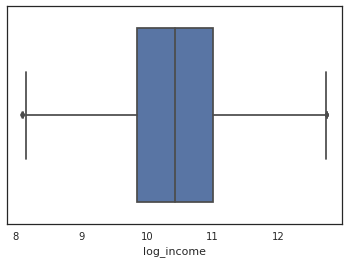

In [37]:
sns.boxplot(x=df["log_income"])

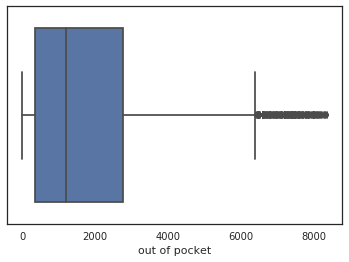

In [38]:
sns.boxplot(x=df["out of pocket"])

In [39]:
# Constructing of X data set containing the prediction variables as well as the vector y containing the data to be predicted.
X = df.drop('out of pocket', axis=1)
Y = df['out of pocket']

# Splitting of X and Y into two parts each, which will be used for training (80%) and testing (20%) the model.
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 1) 

print ('Number of training data:',len(X_Train))
print ('Number of testing data:',len(X_Test))

Number of training data: 5239
Number of testing data: 1310


In [40]:
# Check the type and shape of X
print(type(X))
print(X.shape)

# Check the type and shape of Y
print(type(Y))
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
(6549, 22)
<class 'pandas.core.series.Series'>
(6549,)


In [41]:
# Default split is 80% for training and 20% for testing
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(5239, 22)
(1310, 22)
(5239,)
(1310,)


*toelichten* 

***

<a id='Results'></a>

## Results

<a id='Descriptive Statistics'></a>

### Descriptive statistics

Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. As such, it is a good idea to review all of the pair-wise correlations of the attributes in your dataset. You can use the corr() function on the Pandas DataFrame to calculate a correlation matrix.

In [29]:
print('The final training dataframe consists of',X_Train.shape[0],'rows and',X_Train.shape[1],'columns')
print('The final test dataframe consists of',X_Test.shape[0],'rows and',X_Test.shape[1],'columns')

The final training dataframe consists of 5239 rows and 22 columns
The final test dataframe consists of 1310 rows and 22 columns


In [30]:
df.describe()

,out of pocket,age,gender,race_2.0,race_3.0,education,log_income,children,health_2.0,health_3.0,...,alcohol_1.0,alcohol_2.0,alcohol_3.0,alcohol_4.0,alcohol_5.0,alcohol_6.0,alcohol_7.0,smoking,covered_government,covered_employer
count,6549,6549,6549,6549,6549,6549,6549,6549,6549,6549,...,6549,6549,6549,6549,6549,6549,6549,6549,6549,6549
mean,1883,78,0,0,0,12,10,3,0,0,...,0,0,0,0,0,0,0,0,1,0
std,1989,5,0,0,0,3,1,2,0,0,...,0,0,0,0,0,0,0,0,0,1
min,0,70,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,350,73,0,0,0,12,10,2,0,0,...,0,0,0,0,0,0,0,0,1,0
50%,1200,77,0,0,0,12,10,3,0,0,...,0,0,0,0,0,0,0,0,1,0
75%,2776,81,1,0,0,14,11,4,0,1,...,0,0,0,0,0,0,0,0,1,1
max,8360,89,1,1,1,17,13,20,1,1,...,1,1,1,1,1,1,1,1,1,11


Correlations all variables


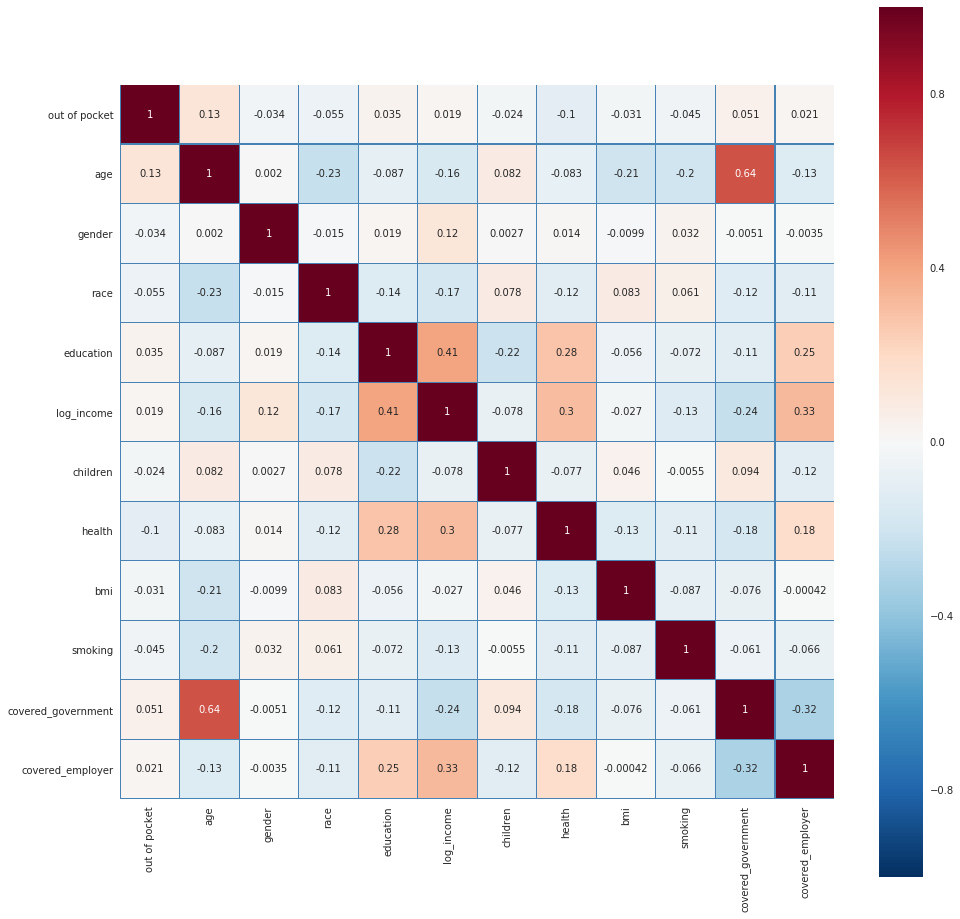

In [31]:
# Displaying Pearson's correlations
plt.figure(figsize=(16,16)) 
sns.heatmap(df0.corr(method='pearson'), linewidth=0.2,vmax=1.0,square=True, linecolor='steelblue', annot=True)
print('Correlations all variables')

correlation with respect to out of pocket expenditures


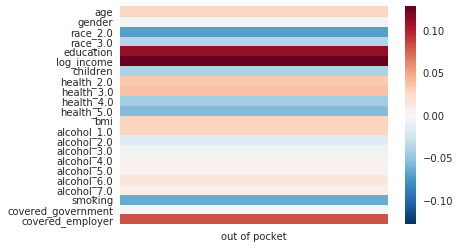

In [32]:
sns.heatmap(df.corr()[['out of pocket']].iloc[1:])
print('correlation with respect to out of pocket expenditures')

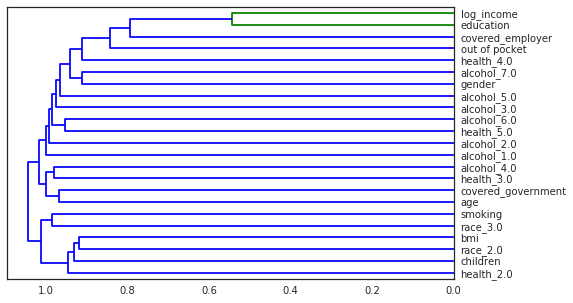

In [33]:
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(8,5))
dendrogram = hc.dendrogram(z, labels=df.columns, 
      orientation='left', leaf_font_size=10)
plt.show()

The figures above show the correlations between the variables in our data, which is interesting to know to see which variables move in the same direction. In the first figure we can see that some variables are (relatively) highly correlated to each other. In this case, some correlations are less relevant like for the health dummies to each other. The correlation between log_income and education is (positively) high, which makes sense since people with a higher education have higher earnings in general.
In the second figure the correlations with respect to out of pocket are visualized, which is visualized relative to each other. We can see that log_income, education and smoking show the most outstanding correlation. Log_income and education are positively correlated to out of pocket expenditures (and also to another) and smoking is negatively correlated.
However, correlations do not necessarily imply causation so we cannot draw conclusions from this and many factors can play a role which are not taken into account.

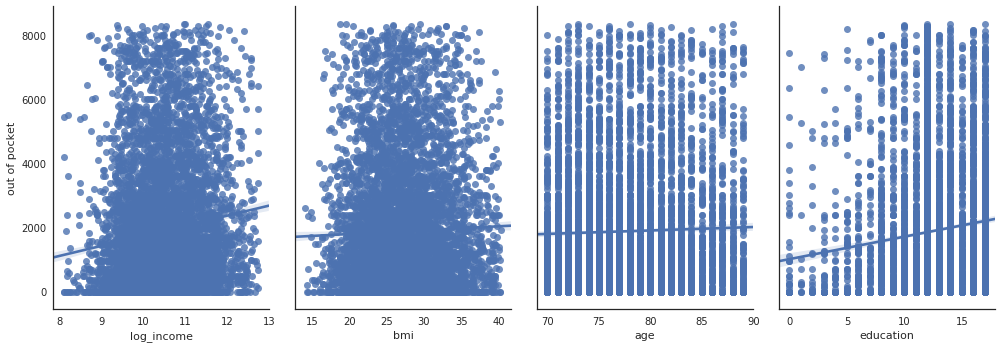

In [34]:
sns.pairplot(df, x_vars=['log_income','bmi', 'age', 'education'], y_vars='out of pocket', size=5, aspect=0.7, kind='reg')

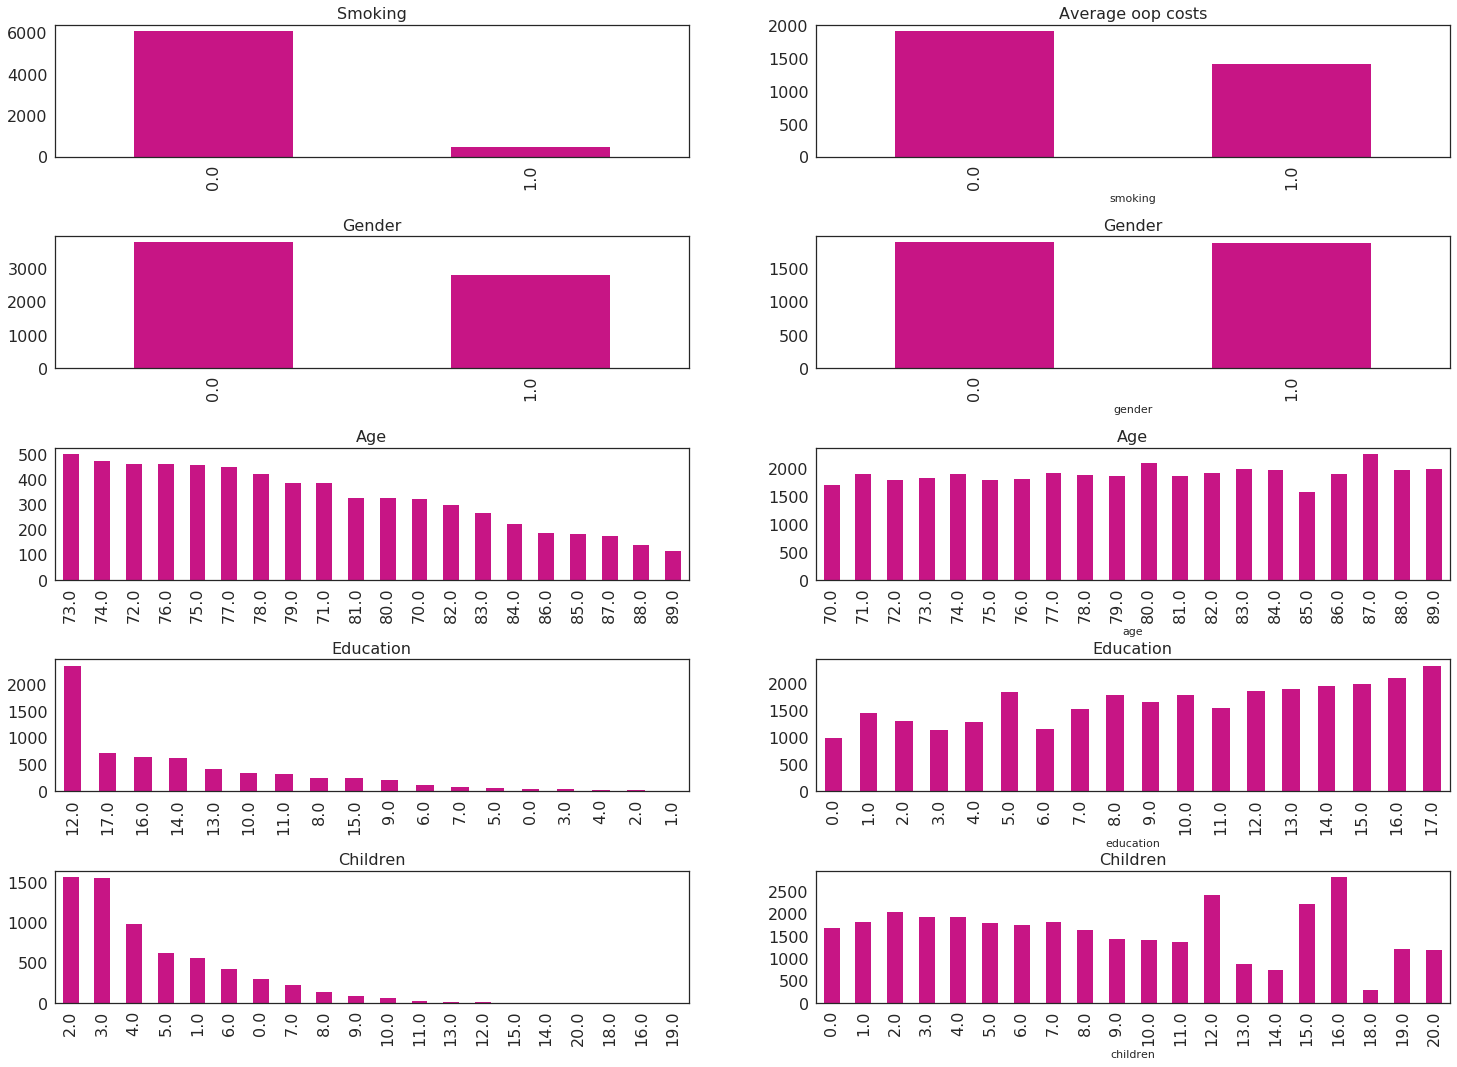

In [35]:
fig, axarr = plt.subplots(5, 2, figsize=(25, 18))                            
df['smoking'].value_counts().plot.bar(ax=axarr[0][0], fontsize=16, color='mediumvioletred')
axarr[0][0].set_title("Smoking", fontsize=16)
df.groupby('smoking')['out of pocket'].mean().plot.bar(y = "out of pocket" ,color='mediumvioletred',ax=axarr[0][1],fontsize=16)
axarr[0][1].set_title("Average oop costs", fontsize=16)
df['gender'].value_counts().plot(ax=axarr[1][0], fontsize=16, color='mediumvioletred', kind='bar')
axarr[1][0].set_title("Gender", fontsize=16)
df.groupby('gender')['out of pocket'].mean().plot.bar(ax=axarr[1][1],color='mediumvioletred',fontsize=16)
axarr[1][1].set_title("Gender", fontsize=16)
df['age'].value_counts().plot.bar(ax=axarr[2][0], fontsize=16, color='mediumvioletred')
axarr[2][0].set_title("Age", fontsize=16)
df.groupby('age')['out of pocket'].mean().plot.bar(y = "out of pocket" ,color='mediumvioletred',ax=axarr[2][1], fontsize=16)
axarr[2][1].set_title("Age", fontsize=16)
df['education'].value_counts().plot.bar(ax=axarr[3][0], fontsize=16,color='mediumvioletred')
axarr[3][0].set_title("Education", fontsize=16)
df.groupby('education')['out of pocket'].mean().plot.bar(ax=axarr[3][1],color='mediumvioletred',fontsize=16)
axarr[3][1].set_title("Education", fontsize=16)

df['children'].value_counts().plot.bar(ax=axarr[4][0], fontsize=16,color='mediumvioletred')
axarr[4][0].set_title("Children", fontsize=16)
df.groupby('children')['out of pocket'].mean().plot.bar(ax=axarr[4][1],color='mediumvioletred',fontsize=16)
axarr[4][1].set_title("Children", fontsize=16)
plt.subplots_adjust(hspace=.6)


From the plots above we can see that some variables are quite distributed. If we look at smoking we can see that only a small fraction of the elderly smoke. This is surprising, since we expected to have a high group of smokers because in the past it was normal for people to smoke, so also for this generation. The average out of pocket costs are also higher for the non-smokers, but we can probably not draw conclusions with this dataset of smoking on out of pocket costs since the group smokers is too small. 
Another striking conclusion is the distribution of education, since the plot shows that most of the people went to school for 12 years. A potential reason might be due that people did continue studying after high school. 

In [36]:
data = [go.Histogram(x=df['bmi'])] 
py.plot(data, filename = 'basic-line', auto_open=True)

'https://plot.ly/~larissssx/1'

In [40]:
data = [go.Histogram(x=df['bmi'])] 
py.iplot(data, filename = 'basic-line')

In [38]:
data = [go.Histogram(x=df['log_income'])] 
py.plot(data, filename = 'logincome', auto_open=True)        

'https://plot.ly/~larissssx/11'

In [39]:
data = [go.Histogram(x=df['log_income'])] 
py.iplot(data, filename = 'logincome')

### Multivariate Linear Regression

**Fitting**

In [ ]:
# Fitting the model to the training data 
lr = LinearRegression()
lr.fit(X_Train, Y_Train)

In [ ]:
# Estimating the intercept
lr.intercept_

# Estimating the coefficients
lr.coef_

# Printing the intercept and coefficients
print('Constant: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

**Predicting**

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_Test)

Making a prediction of out of pocket medical expenditures with the following characteristis:

- age = 82
- gender = male
- education = 7 years
- health = 2
- bmi = 30
- smoking = yes
- alcohol = 5
- income = 9

In [ ]:
df.head()

In [ ]:
lr.predict([82,1,7,1,0,0,0,30,1,0,0,0,0,1,0,0,9])

Making a prediction of out of pocket medical expenditures with the following characteristis:

- age = 74
- gender = female
- education = 17 years
- health = 3
- bmi = 26
- smoking = yes
- alcohol = 2
- income = 7

In [ ]:
print(lr.predict([74,0,17,0,1,0,0,26,1,0,0,0,0,1,0,2,7]))

**Interpreting**

How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:

This is a statement of association, not causation
If an increase in TV ad spending was associated with a decrease in sales,  β1  would be negative.

Dummy's:

For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average increase in Sales of 57.42 widgets (as compared to a small market, which is called the baseline level).

**Evaluating**

In [ ]:
score = sk.metrics.r2_score(Y_Test, y_pred)
print('sklearn: R2 score for Linear Regression is: {}'.format(score))

In [ ]:
# Calculating the mean square error 
mean_squared_error = mean_squared_error(Y_Test,y_pred) 

# Calculating the R square
r2_score = r2_score(Y_Test,y_pred) 

print ('Mean square error:',mean_squared_error)
print ('R square:',r2_score)

In [ ]:
# Score on the Train set
print("Score on the Train set:", lr.score(X_Train, Y_Train))

# Score on the Test set
print("Score on the Test set:",lr.score(X_Test, Y_Test))

We use the R^2 and RSE to judge how well the model fits the data.


The model reported the coefficients of all features, and the R square on the training data is good. However, the R square of the testing data is much lower, indicating an overfitting situation.

"R-squared" (R^2) is proportion of variability in y that can be explained using x
- Ranges from 0 to 1
- 0.75 means fitted model showed 75% reduction in error over null model
- Higher R^2 indicates a stronger relationship between x and y

In [ ]:
fig, ax = plt.subplots(figsize=(5,5));
plt.scatter(y_pred, Y_Test);
plt.title('Predicted and actual oopme');
plt.xlabel('Predicted');
plt.ylabel('Actual');

<a id='Lasso Regression'></a>

### Lasso Regression

**Fitting**

In [ ]:
lasso = Lasso()
lasso.fit(X_Train,Y_Train)

In [ ]:
train_score1=lasso.score(X_Train,Y_Train)
test_score1=lasso.score(X_Test,Y_Test)
coeff_used1 = np.sum(lasso.coef_!=0)
print("Training score:", train_score1)
print("Test score: ", test_score1)
print("Number of features used", coeff_used1)

The default value of regularization parameter in Lasso regression (given by alpha) is 1. With this, out of 30 features in cancer data-set, only 4 features are used (non zero value of the coefficient).

Both training and test score (with only 4 features) are low; conclude that the model is under-fitting the cancer data-set.
Reduce this under-fitting by reducing alpha and increasing number of iterations. Now alpha = 0.01, non-zero features =10, training and test score increases.

Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.
Further reduce alpha =0.0001, non-zero features = 22. Training and test scores are similar to basic linear regression case.
In the right panel of figure, for alpha = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=1000, normalize = True)
lasso001.fit(X_Train,Y_Train)

In [ ]:
train_score001=lasso001.score(X_Train,Y_Train)
test_score001=lasso001.score(X_Test,Y_Test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("Training score:", train_score001)
print("Test score: ", test_score001)
print("Number of features used", coeff_used001)

In [ ]:
lasso0001 = Lasso(alpha=0.0001, max_iter=10000, normalize = True)
lasso0001.fit(X_Train,Y_Train)

In [ ]:
train_score001=lasso001.score(X_Train,Y_Train)
test_score001=lasso001.score(X_Test,Y_Test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("Training score:", train_score001)
print("Test score: ", test_score001)
print("Number of features used", coeff_used001)

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
lasso3 = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso3.set_params(alpha=a)
    lasso3.fit(X_Train, Y_Train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_Train, Y_Train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_Train, Y_Train)
mean_squared_error(Y_Test, lasso.predict(X_Test))

In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

***

<a id='Random Forest Model'></a>

### Random Forest Model

**Fitting**

In [42]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_Train, Y_Train)
rf.score(X_Train, Y_Train)
acc_rf = round(rf.score(X_Train, Y_Train) * 100, 2)
print(round(acc_rf,2,), "%")
rf.score(X_Train, Y_Train)

85.62 %


0.8561796368830206

We already defined the Train and Test set, <a href='#Construct Test and Train data'>Construct Test and Train data</a> which we will use for the Random Forest Model. rf.fit is used to pass in the independent variables and our dependent variable out of pocket. The rf.score shows the $R^2$ of the trainings variables, which looks good since it is quiet high (1 is the highest), but this is for the training set.
n_estimators shows the number of trees the forest has. When the n_estimators is higher, the model might be more accurate. In general, n_estimators will be set between 60 and 120 in most models since on a certain point the model does not improve anymore and only becomes slower.

In [43]:
def print_score(rf):
    res = [rf.score(X_Train, Y_Train), rf.score(X_Test, Y_Test)]
    if hasattr(rf, 'oob_score_'): res.append(rf.oob_score_)
    print(res)

In [44]:
%time rf.fit(X_Train, Y_Train)
print_score(rf)

CPU times: user 2.44 s, sys: 16 ms, total: 2.46 s
Wall time: 4.9 s
[0.85798579450947, -0.0058343590935410194]


%time shows the time it takes to run for the computer since it should not run for too long. In this case this is not a problem/.
However, this $R^2$ did not give a complete view of how good our model is. Unfortunately the $R^2$ for the test set is way lower (4th column) and is behaving poorly. The $R^2$ is even negative, which means the outcome of the test set is really bad and the model is worse than predicting the mean. A reason for this problem is that the model might be overfitting and the training model is not representative. 


**Other version**

In [45]:
forest = RandomForestRegressor(n_estimators = 300, random_state = 1,n_jobs = -1, oob_score=True)
forest.fit(X_Train,Y_Train)
forest_train_pred = forest.predict(X_Train)
forest_test_pred = forest.predict(X_Test)

In [46]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_Train,forest_train_pred),
mean_squared_error(Y_Test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_Train,forest_train_pred),
r2_score(Y_Test,forest_test_pred)))
print_score(forest)

MSE train data: 551568.172, MSE test data: 3963853.665
R2 train data: 0.861, R2 test data: -0.012
[0.8608760195780861, -0.011862307049795406, -0.02536827524526508]


Since the outcomes are really bad, we also tried another forest but it keeps the same problems. n_jobs tells how many processors could be used, and when it is equal to -1 there is no limit. The oob_score is also set to "true", this is another random forest cross validation method (out of bag sampling). The oob score is also negative, which again confirmst the problems with our model.

**Visualization**


In [47]:
fig = {
    'data': [
        {'x': Y_Train, 'y': forest_train_pred - Y_Train, 'mode': 'markers', 'name': 'Train data'},
        {'x': Y_Test, 'y': forest_test_pred - Y_Test, 'mode': 'markers', 'name': 'Test data'}
    ],
    'layout': {
        'xaxis': {'title': 'Reported Y'},
        'yaxis': {'title': "Difference"}
    }
}
py.iplot(fig, filename='hoiii')

In [48]:
fig = {
    'data': [
        {'x': forest_train_pred, 'y': forest_train_pred - Y_Train, 'mode': 'markers', 'name': 'Train data'},
        {'x': forest_test_pred, 'y': forest_test_pred - Y_Test, 'mode': 'markers', 'name': 'Test data'}
    ],
    'layout': {
        'xaxis': {'title': 'Predicted Y'},
        'yaxis': {'title': "Difference"}
    }
}
py.iplot(fig, filename='hoiii')

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(Y_Train,forest_train_pred - Y_Train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(Y_Test,forest_test_pred - Y_Test,
          c = 'c', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')
plt.xlabel('Reported Y')
plt.ylabel('Difference')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 10000, lw = 2, color = 'red')
plt.show()

The above plot shows the difference between the reported Y and the predicted Y for all test and trainings data.
We can see that for low reported Y's the difference is small and slightly positive in the training set. For higher values of Y, approximately Y>2500, the predicted Y is lower than the actual reported values of Y.
This plot also shows that the training data works quite well (untill a reported Y of 4500), but the results of the test
data is way worse. They move in the same direction, but the differences are higher for the test set which shows that 
the predictions are less accurate for this data. 

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - Y_Train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - Y_Test,
          c = 'c', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')
plt.xlabel('Predicted Y')
plt.ylabel('Difference')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 10000, lw = 2, color = 'red')
plt.show()

This plot is similar to the one before, but in this case the predicted Y is on the axis. It shows that the model has problems with predicting higher Y values and it only predicts untill 6000 for the train set. For the test set, this problem is even worse and the maximum is aprroximately 4000.

**Importance**

In [49]:
importances = pd.DataFrame({'feature':X_Train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

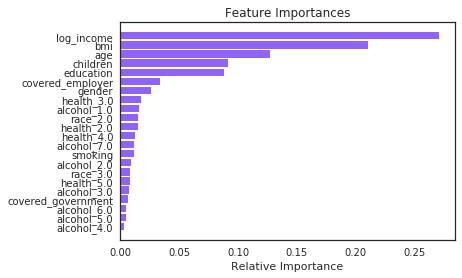

In [50]:
features = X.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

The feature importances plot shows which column play an important role in the random random forest. From this plot we can
conclude that, according to our rf model, log_income, bmi and age play an important role in determining the out of pocket 
expenditures for a person. With these feature importances, it might be good to get more insights in the important features.
After intepreting the results of feature importance, it could be useful to remove features that are not important for predicting the model. In this case, we do not have so many features and therefore we do not apply this. 

**Predicting**

In [51]:
from treeinterpreter import treeinterpreter as ti

In [52]:
row = X_Train.values[None,0]; row

array([[75.        ,  0.        ,  0.        ,  0.        , 12.        ,
        10.28506972,  2.        ,  0.        ,  1.        ,  0.        ,
         0.        , 20.6       ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ]])

In [ ]:
print(rf.predict([70,1,0,1,12,13,4,1,0,0,0,30,0,0,0,0,0,0,0,0,1,0]))

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

### Ordinary Least Squares

In [ ]:
# Running an OLS
X_Train = pd.concat([pd.DataFrame(np.ones((X_Train.shape[0], 1)).astype(int),
                                  index=X_Train.index), X_Train], axis=1)
X_Train.rename(columns={0: 'const'}, inplace=True)

X_opt = X_Train[['age', 'gender', 'education','health_2.0', 'health_3.0', 'health_4.0', 'health_5.0', 'bmi', \
                 'smoking', 'alcohol_1.0', 'alcohol_2.0','alcohol_3.0','alcohol_4.0','alcohol_5.0','alcohol_6.0',\
                 'alcohol_7.0','log_income']]
OLS = sm.OLS(endog = Y_Train, exog = X_opt).fit()
OLS.summary()

***

<a id='Discussion'></a>

## Discussion

Text

***

<a id='Conclusion'></a>

## Conclusion

In [ ]:
models = [lr, lasso]
models

We implemented multiple linear regression with an accuracy of 52%.

We implemented Random Forest with an accuracy of XX%.

***

<a href='#Back to top'>Back to top</a>